#Exploratory Data Analysis on Covid 19 
#and Vaccination Drive In India  






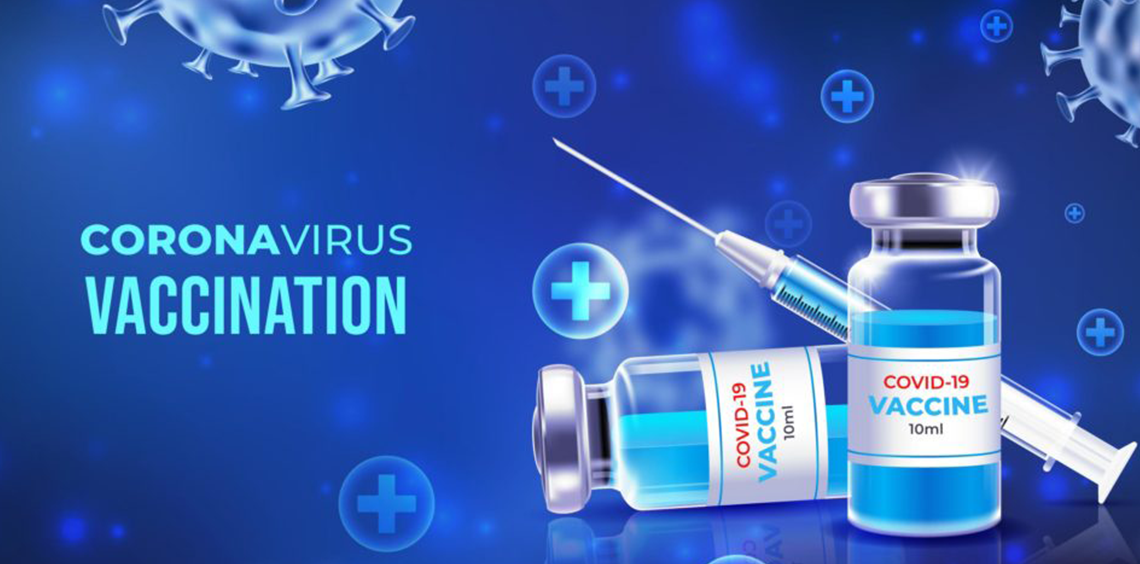

Almost a year into the COVID-19 pandemic, scientists throughout the world have swiftly moved to develop safe and effective vaccines that will help reduce illness, hospitalizations, and deaths associated with COVID-19. These vaccines are expected to make a significant contribution to equitable protection and promotion of human well-being and a gradual return to social, economic, work, and family life.

The given dataset contains recent vaccination details in various countries by several vaccine manufacturers.

The most powerful tools for data analysis used in this project are the packages Numpy and Pandas, and to visualize and explore the data: Matplotlib, Plotly and Seaborn. All of these tools were meaningfully and efficiently taught in the course "Data Analysis with Python: Zero to Pandas" given by Jovian in partnership with freeCodeCamp.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


# Table of content

## 1.Reading of dataset

Importing all the Packages required for the 'Exploratory Data Analysis'

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


## Downloading the Dataset

The dataset is downloaded from Kaggle from https://www.kaggle.com/sudalairajkumar/covid19-in-india

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/sudalairajkumar/covid19-in-india' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: ··········


100%|██████████| 655k/655k [00:00<00:00, 50.4MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './covid19-in-india'

In [ ]:
import os
os.listdir(data_dir)

['covid_19_india.csv',
 'StatewiseTestingDetails.csv',
 'covid_vaccine_statewise.csv']

There are three csv files in the dataset directory namely,

1) 'covid_19_india.csv'

2) 'StatewiseTestingDetails.csv'

3) 'covid_vaccine_statewise.csv'

##With the help of pandas function pd.read_csv() , the Dataset csv file is opened and read.

In [ ]:
covid_df=pd.read_csv("covid19-in-india/covid_19_india.csv")

In [ ]:
state_df=pd.read_csv("covid19-in-india/covid_19_india.csv")

In [ ]:
vaccine_df=pd.read_csv("covid19-in-india/covid_vaccine_statewise.csv")

Thus the dataset in csv format is now stored in the form of 'DataFrame'

In [ ]:
project_name = "eda_on_covid_19_and_vaccination_drive_in_india"

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india


'https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india'

##2. Data Preparation and Cleaning

Data cleaning routines work to "clean" the data vy filling in missing vakues,smoothing noise data,identifying or removing outliers, and resolving inconsistencies.

Real world Data tend to be incomplete, noisy and inconsistent. Data cleaning(or Data cleanzing) routines attempt to fill in missing values smooth out noise while while identifying outliers and correct inconsistencies in the Data.



###**2.1 Analysis of Shape and Size of the DataFrame i.e. Columns and Rows**

In [ ]:
print('Covid 19 in India Dataset')
print('Rows: ',covid_df.shape[0])
print('Column: ',covid_df.shape[1])
print('Total size: ',covid_df.size)

Covid 19 in India Dataset
Rows:  16850
Column:  9
Total size:  151650


In [ ]:
print('Statewise Testing Details Dataset')
print('Rows: ',state_df.shape[0])
print('Column: ',state_df.shape[1])
print('Total size: ',state_df.size)

Statewise Testing Details Dataset
Rows:  16850
Column:  9
Total size:  151650


In [ ]:
print('Statewise Vaccination in India Dataset')
print('Rows: ',vaccine_df.shape[0])
print('Column: ',vaccine_df.shape[1])
print('Total size: ',vaccine_df.size)

Statewise Vaccination in India Dataset
Rows:  6699
Column:  18
Total size:  120582


####**2.2  Overviewing the data before modifications**

In [ ]:
covid_df.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month,Day,Weekday,Active_cases
0,Kerala,0,0,1,2020,1,30,3,1
1,Kerala,0,0,1,2020,1,31,4,1
2,Kerala,0,0,2,2020,2,1,5,2
3,Kerala,0,0,3,2020,2,2,6,3
4,Kerala,0,0,3,2020,2,3,0,3


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UnionTerritory  16850 non-null  object
 1   Cured                 16850 non-null  int64 
 2   Deaths                16850 non-null  int64 
 3   Confirmed             16850 non-null  int64 
 4   Year                  16850 non-null  int64 
 5   Month                 16850 non-null  int64 
 6   Day                   16850 non-null  int64 
 7   Weekday               16850 non-null  int64 
 8   Active_cases          16850 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.2+ MB


In [ ]:
# Checking for any null values
covid_df.isnull().sum()

State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
Year                    0
Month                   0
Day                     0
Weekday                 0
Active_cases            0
dtype: int64

In [ ]:
# Dropping the columns which are not going to be used

covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

####**Adding new columns of Year, Month , Day and Weekday**

In [203]:
#covid_df['Year'] = pd.DatetimeIndex(covid_df.Date).year
#covid_df['Month'] = pd.DatetimeIndex(covid_df.Date).month
#covid_df['Day'] = pd.DatetimeIndex(covid_df.Date).day
#covid_df['Weekday'] = pd.DatetimeIndex(covid_df.Date).weekday

In [204]:
#covid_df.drop(["Date"],inplace=True,axis=1)

####**Adding column for Active cases in covid_df**

In [ ]:
#finding the active cases

covid_df['Active_cases']=covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])
covid_df.head()


,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month,Day,Weekday,Active_cases
0,Kerala,0,0,1,2020,1,30,3,1
1,Kerala,0,0,1,2020,1,31,4,1
2,Kerala,0,0,2,2020,2,1,5,2
3,Kerala,0,0,3,2020,2,2,6,3
4,Kerala,0,0,3,2020,2,3,0,3


####**Data Cleaning for covid_df** 

In [ ]:
covid_df['Confirmed'] = pd.to_numeric(covid_df['Confirmed'], errors='coerce')
covid_df['Confirmed']=covid_df['Confirmed'].fillna(0)
covid_df['Confirmed']=covid_df['Confirmed'].astype('int')

covid_df['Deaths'] = pd.to_numeric(covid_df['Deaths'], errors='coerce')
covid_df['Deaths']=covid_df['Deaths'].fillna(0)
covid_df['Deaths']=covid_df['Deaths'].astype('int')

covid_df['Cured'] = pd.to_numeric(covid_df['Cured'], errors='coerce')
covid_df['Cured']=covid_df['Cured'].fillna(0)
covid_df['Cured']=covid_df['Cured'].astype('int')

covid_df['Deaths'] = pd.to_numeric(covid_df['Deaths'], errors='coerce')
covid_df['Deaths']=covid_df['Deaths'].fillna(0)
covid_df['Deaths']=covid_df['Deaths'].astype('int')

covid_df['Cured'] = pd.to_numeric(covid_df['Cured'], errors='coerce')
covid_df['Cured']=covid_df['Cured'].fillna(0)
covid_df['Cured']=covid_df['Cured'].astype('int')

##Statewise Analysis


In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
testing=state_df.groupby("State/UnionTerritory")[["Cured","Deaths","Confirmed"]].sum()

In [ ]:
testing

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,1589935,22624,1675248
Andhra Pradesh,303427899,2475816,324146783
Arunachal Pradesh,5150519,19303,5598324
Assam,74011348,459575,80418492
Bihar,100131380,756282,106881540
Bihar****,1402468,18881,1430909
Cases being reassigned to states,0,0,345565
Chandigarh,7980284,119356,8691806
Chhattisgarh,117163544,1591126,128751782


In [ ]:
statewise  = pd.pivot_table(covid_df, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
statewise ['Recovery Rate'] = statewise ['Cured']*100 / statewise ['Confirmed']
statewise ['Mortality Rate'] = statewise ['Deaths']*100 /statewise ['Confirmed']
statewise  = statewise .sort_values(by='Confirmed', ascending= False)
statewise .style.background_gradient(cmap='YlOrRd')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6113335,5872268,123531,96.056702,2.020681
Kerala,2996094,2877557,13960,96.043615,0.465940
Karnataka,2859595,2784030,35526,97.357493,1.242344
Tamil Nadu,2503481,2435872,33132,97.299400,1.323437
Andhra Pradesh,1908065,1861937,12898,97.582472,0.675973
Uttar Pradesh,1706818,1682130,22656,98.553566,1.327382
West Bengal,1507241,1472132,17834,97.670645,1.183222
Delhi,1434687,1408853,25001,98.199328,1.742610
Chhattisgarh,996359,977893,13462,98.146652,1.351119


It's no brainer that Maharshtra tops this list in all aspect

Considering the number of cases Punjab has done a great job when it comes to recovery rate

Similarly in terms of mortality rate West Bengal and Gujarat seem to have higher numbers

Tamilnadu, Maharshtra, Andhra Pradesh and Rajastan respectively had ramped up their testing capabilities

Though being second in the country w.r.t. total confirmed cases Tamilnadu seem to have established the healthcare facility to a higher level which is evident from the lower mortality rate (0.6%

In [205]:
#state_df.drop(["Recovery Rate","Mortality Rate"],inplace=True,axis=1)

In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


###**Data Cleaning in vaccine_df**

In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           6699 non-null   object 
 1   State                                6699 non-null   object 
 2   Total Doses Administered             6364 non-null   float64
 3   Total Sessions Conducted             6363 non-null   float64
 4   Total Sites                          6363 non-null   float64
 5   First Dose Administered              6363 non-null   float64
 6   Second Dose Administered             6363 non-null   float64
 7   Male(Individuals Vaccinated)         6363 non-null   float64
 8   Female(Individuals Vaccinated)       6363 non-null   float64
 9   Transgender(Individuals Vaccinated)  6363 non-null   float64
 10  Total Covaxin Administered           6363 non-null   float64
 11  Total CoviShield Administered 

In [ ]:
vaccine_df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                335
Total Sessions Conducted                336
Total Sites                             336
First Dose Administered                 336
Second Dose Administered                336
Male(Individuals Vaccinated)            336
Female(Individuals Vaccinated)          336
Transgender(Individuals Vaccinated)     336
Total Covaxin Administered              336
Total CoviShield Administered           336
Total Sputnik V Administered           4962
AEFI                                   2519
18-45 years (Age)                      2522
45-60 years (Age)                      2521
60+ years (Age)                        2521
Total Individuals Vaccinated            336
dtype: int64

In [ ]:
vaccine_df.drop(["AEFI"],inplace=True,axis=1)

In [ ]:
vaccine_df['Total Doses Administered'].fillna(vaccine_df['Total Doses Administered'].mean(),inplace=True)
vaccine_df['Total Sessions Conducted'].fillna(vaccine_df['Total Sessions Conducted'].mean(),inplace=True)
vaccine_df['First Dose Administered'].fillna(vaccine_df['First Dose Administered'].mean(),inplace=True)
vaccine_df['Second Dose Administered'].fillna(vaccine_df['Second Dose Administered'].mean(),inplace=True)
vaccine_df['Male(Individuals Vaccinated)'].fillna(vaccine_df['Male(Individuals Vaccinated)'].mean(),inplace=True)
vaccine_df['Female(Individuals Vaccinated)'].fillna(vaccine_df['Female(Individuals Vaccinated)'].mean(),inplace=True)
vaccine_df['Transgender(Individuals Vaccinated)'].fillna(vaccine_df['Transgender(Individuals Vaccinated)'].mean(),inplace=True)
vaccine_df['Total Doses Administered'].fillna(vaccine_df['Total Doses Administered'].mean(),inplace=True)
vaccine_df['Total Covaxin Administered'].fillna(vaccine_df['Total Covaxin Administered'].mean(),inplace=True)
vaccine_df['Total CoviShield Administered'].fillna(vaccine_df['Total CoviShield Administered'].mean(),inplace=True)
vaccine_df['Total Sputnik V Administered'].fillna(vaccine_df['Total Sputnik V Administered'].mean(),inplace=True)
vaccine_df['18-45 years (Age)'].fillna(vaccine_df['18-45 years (Age)'].mean(),inplace=True)
vaccine_df['45-60 years (Age)'].fillna(vaccine_df['45-60 years (Age)'].mean(),inplace=True)
vaccine_df['60+ years (Age)'].fillna(vaccine_df['60+ years (Age)'].mean(),inplace=True)

In [ ]:
vaccine_df.fillna(method='ffill',inplace=True)

In [ ]:
vaccine_df.isnull().sum()

Updated On                             0
State                                  0
Total Doses Administered               0
Total Sessions Conducted               0
Total Sites                            0
First Dose Administered                0
Second Dose Administered               0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Covaxin Administered             0
Total CoviShield Administered          0
Total Sputnik V Administered           0
18-45 years (Age)                      0
45-60 years (Age)                      0
60+ years (Age)                        0
Total Individuals Vaccinated           0
dtype: int64

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india


'https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india'

##**3. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis**





<p>Data Visualization aims to communicate Data clearly and effectively through Graphical representation</p>

Let's begin by importing librairies like `matplotlib.pyplot` and `seaborn`.

In [ ]:
# Data Visualization Liraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown

###**1. Statewise Cured Individuals Stats**




In [ ]:
testing1=state_df.groupby('State/UnionTerritory')['Cured'].max().sort_values(ascending=False).reset_index()
fig1 = px.bar(testing1, 
             x="Cured",
             y="State/UnionTerritory", 
             orientation='h',
             height=800,
             title='Statewise Cured Stats',
            color='State/UnionTerritory')
fig1.show()

###**2.Statewise deaths Stats**

In [ ]:
testing2=state_df.groupby('State/UnionTerritory')['Deaths'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing2, 
             x="Deaths",
             y="State/UnionTerritory", 
             orientation='h',
             height=800,
             title='Statewise Death Stats',
            color='State/UnionTerritory')
fig.show()

###**3. Confirmed Cases Over a Span Of Time Across Various States** 

In [ ]:
plt.figure(figsize = (18,10))
figure = px.line(state_df, x='Date', y='Confirmed', color='State/UnionTerritory')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

<Figure size 1296x720 with 0 Axes>

Above data shows Maharastra has more number of active cases.

###**4.Analysis of different types of cases in India**

---



In [ ]:
df1=state_df.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Cured"],
                    mode='lines+markers',
                    name='Cured Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

###**5. Monitoring Recovery Rate and Mortality Rate in India**

In [ ]:
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Cured"]/df1["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Deaths"]/df1["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100

Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.

###**6.No. of Individuals Vaccinated Statewise**

In [ ]:
vc_pro =vaccine_df.groupby('State')['Total Individuals Vaccinated'].max().reset_index().sort_values(['Total Individuals Vaccinated'],ascending=False)
vc_pro

,State,Total Individuals Vaccinated
13,India,290132865.0
34,Uttar Pradesh,29305008.0
21,Maharashtra,27659911.0
29,Rajasthan,21454435.0
10,Gujarat,21181190.0
16,Karnataka,20169876.0
20,Madhya Pradesh,18792034.0
36,West Bengal,17382673.0
4,Bihar,15046903.0
31,Tamil Nadu,14224524.0


##**7.Maharashtra**

In [206]:
mh = vaccine_df[vaccine_df["State"]=="Maharashtra"] 

###**A) No. of individuals vaccinated from day to day in Maharashtra**

In [ ]:
fig = px.line(mh,x="Updated On",y="Total Individuals Vaccinated",title="Total Individuals Vaccinated from day to day")  
fig.update_xaxes(rangeslider_visible=True) 

###**B) No. of vaccination sessions conducted each day**

In [ ]:
fig = px.line(mh,x="Updated On",y="Total Sessions Conducted",title="Total Number of sessions are conducted from day to day")  
fig.update_xaxes(rangeslider_visible=True) 

###**C) Genderwise Vaccination Ratio** 

In [ ]:
male = mh["Male(Individuals Vaccinated)"].sum() 
female = mh["Female(Individuals Vaccinated)"].sum()  
trans = mh["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19--Maharashtra")

###**D) Ratio of first and second dosage administered** 

In [ ]:
first = mh["First Dose Administered"].sum() 
second = mh["Second Dose Administered"].sum() 
px.pie(names=["First Dose","Second dose"],values=[first,second],title ="First and Second dosage ratio for covid in Maharashtra")

###**E) Age Groupwise Vaccination ratio**

In [ ]:
first_group = mh["18-45 years (Age)"].sum() 
second_group= mh["45-60 years (Age)"].sum() 
third_group=mh["60+ years (Age)"].sum()
px.pie(names=["18-45 years","45-60 years","60+ years"],values=[first_group,second_group,third_group],title ="Age Groupwise dosage ratio for covid in Maharashtra")

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india


'https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india'

## Asking and Answering Questions




###**Q1: List out Top 10 States with Total Individuals Vaccinated**

Text(0.5, 1.0, 'Top 10 States with highest number of Total Individuals Vaccinated')

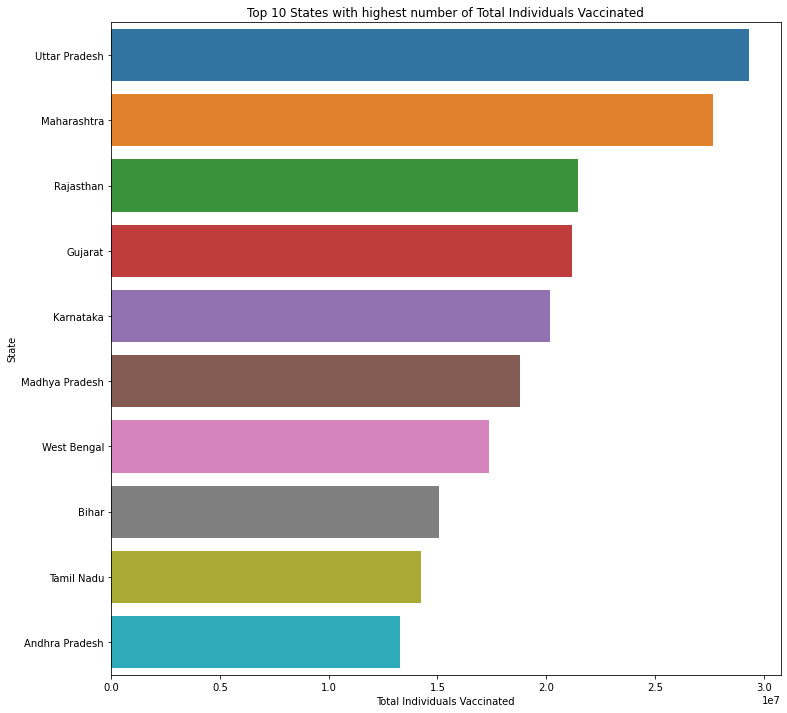

In [ ]:
plt.figure(figsize=(12,12))
top_vaccine=vaccine_df.groupby('State')['Total Individuals Vaccinated'].max().sort_values(ascending=False).reset_index().head(11)
top_cases_df= top_vaccine[top_vaccine['State']!="India"]
sns.barplot(y = 'State',
            x = 'Total Individuals Vaccinated',
            data = top_cases_df);
plt.title('Top 10 States with highest number of Total Individuals Vaccinated')

The above graph shows that:-

1. Uttar Pradesh has the highest number of Total Individuals Vaccinated.

2. Maharashtra has the second highest number of Total Individuals Vaccinated.

3. Rajasthan has the third highest number of Total Individuals Vaccinated.

###**Q2: List out Top 10 States with Highest Death Rate**

In [ ]:
df2=state_df.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).reset_index().head(10)

In [ ]:
df2


,State/UnionTerritory,Deaths
0,Maharashtra,19314532
1,Karnataka,4819018
2,Tamil Nadu,4731627
3,Delhi,4066907
4,Uttar Pradesh,3347656
5,West Bengal,3214840
6,Andhra Pradesh,2475816
7,Punjab,2216735
8,Gujarat,1866811
9,Chhattisgarh,1591126


The above data shows that:-

1. Maharashtra has the highest number of Total Deaths Encountered.

2. Karnataka has the second highest number of Total Deaths Encountered.

3. Tamil Nadu has the third highest number of Total Deaths Encountered.

###**Q3: List out Top 10 States with Highest Recovery Rate**

In [ ]:
df3=state_df.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False).reset_index().head(10)

In [ ]:
df3

,State/UnionTerritory,Cured
0,Maharashtra,813788907
1,Karnataka,345648926
2,Tamil Nadu,317067499
3,Kerala,311127643
4,Andhra Pradesh,303427899
5,Uttar Pradesh,232529439
6,Delhi,224062704
7,West Bengal,195296839
8,Odisha,117984789
9,Rajasthan,117312772


The above data shows that:-

1. Maharashtra has the highest number of Total Cured Patients.

2. Karnataka has the second highest number of Cured Patients.

3. Tamil Nadu has the third highest number of Total Cured Patients.

###**Q4: List out Top 10 States with Most Active Cases**

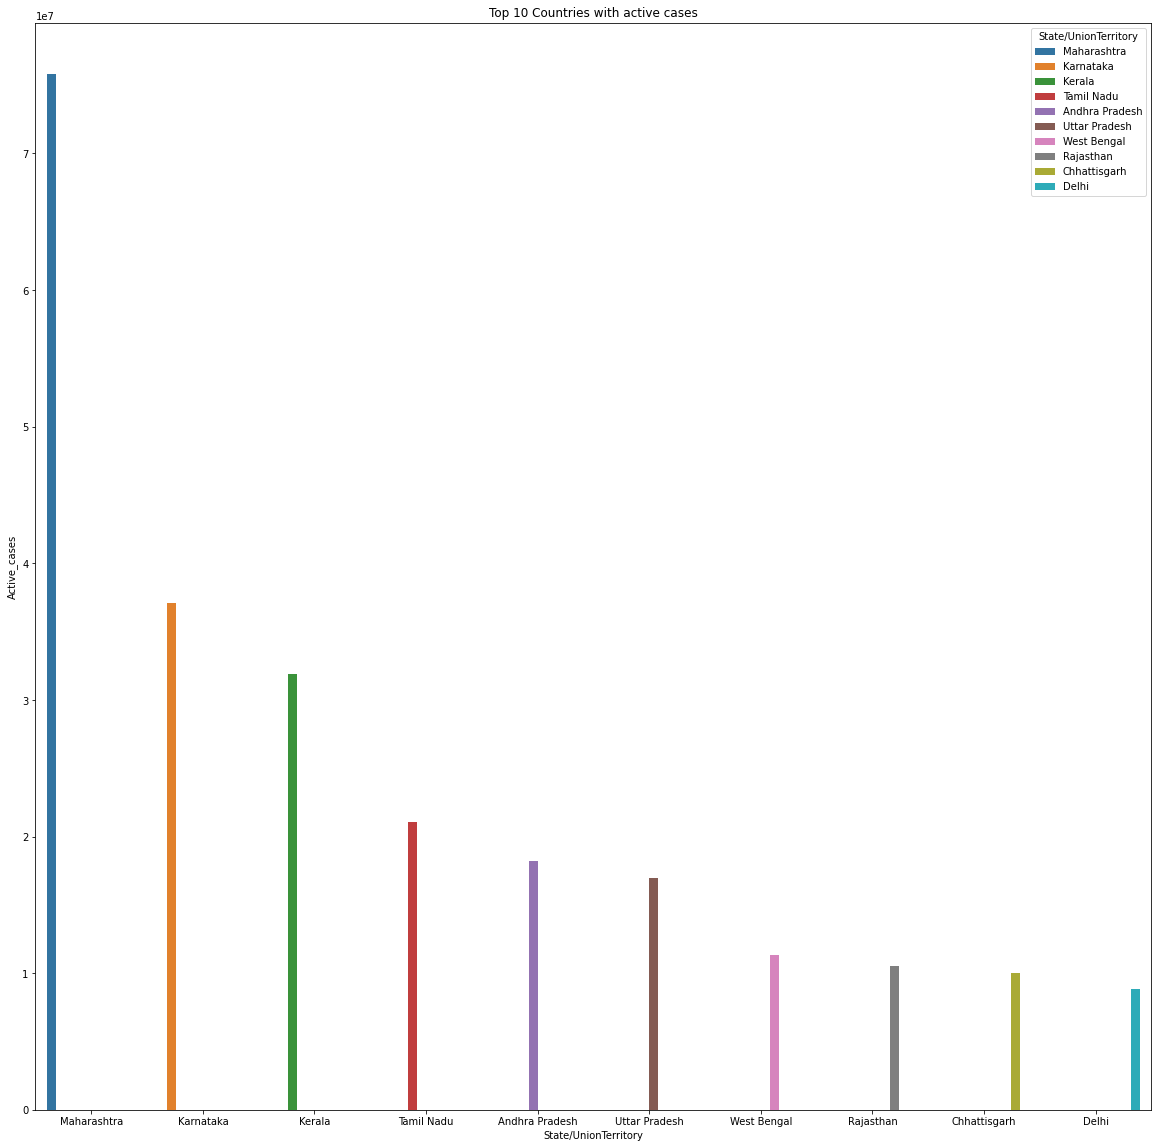

In [ ]:
plt.figure(figsize=(20,20))
top_cases_df= covid_df.groupby('State/UnionTerritory')['Active_cases'].sum().sort_values(ascending = False).reset_index().head(10)

sns.barplot(x = 'State/UnionTerritory',
            y = 'Active_cases',
            data = top_cases_df,hue="State/UnionTerritory");
plt.title('Top 10 Countries with active cases');

The above data shows that:-

1. Maharashtra has the highest number of Total Active cases.

2. Karnataka has the second highest number of Active cases.

3. Kerala has the third highest number of Active cases.

###**Q5: Types of vaccines in use**

In [ ]:
covaxin =vaccine_df["Total Covaxin Administered"].sum() 
covishield = vaccine_df["Total CoviShield Administered"].sum()  
sputnik= vaccine_df["Total Sputnik V Administered"].sum()
px.pie(names=["Covaxin Administered","Covishield Administered","Sputnik V administered"],values=[covaxin,covishield,sputnik],title="Types of Vaccines Used for Covid19--India")

The above Pie Chart Shows that :
1. Covishield is the administered almost 90% of vaccines in India,
2. Covaxin is the administered almost 90% of vaccines in India,
3. Sputnik V is rarely used in India

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india


'https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india'

## Inferences and Conclusion

1. Maharashtra,Karnataka,Tamil Nadu and Kerala are worst hit states due to Covid-19
2. Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases.

3. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

4. Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

5. Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.
6. The vaccine is administered at almost at the rate for Adults(18-60 yrs) (63%) and Senior citizens(37%)
7. Covishield is the most preferred vaccine in India

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india


'https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india'

## References and Future Work


- https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas 
- https://matplotlib.org/ 
- https://pandas.pydata.org/ 
- https://seaborn.pydata.org/ 
- https://numpy.org/ 
- https://www.kaggle.com/ 

Book : Data Mining: Concepts and Techniques
Book by Jiawei Han

In [207]:
import jovian

In [208]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india


'https://jovian.ai/dipteshvarule045/eda-on-covid-19-and-vaccination-drive-in-india'